In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import numpy

from sklearn import tree
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:

file= 'training_data_5.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]




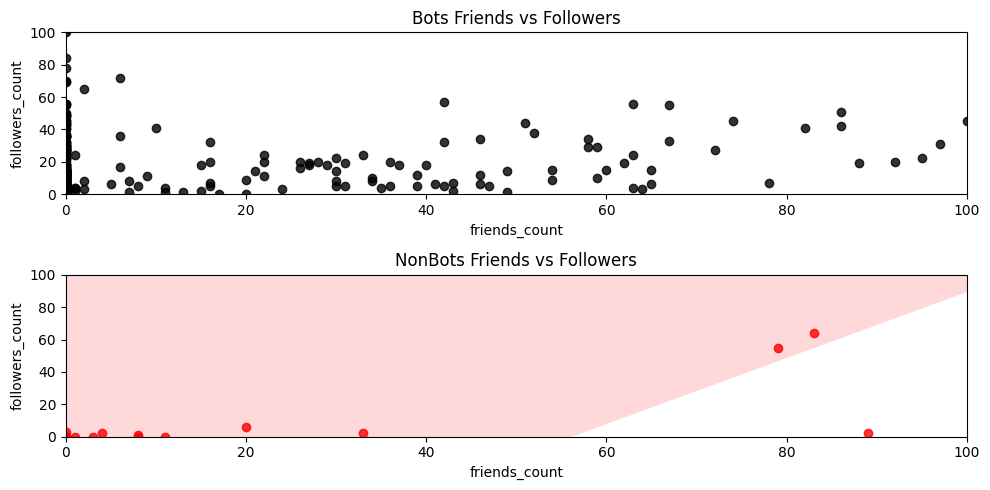

In [4]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(x=bots.friends_count, y=bots.followers_count, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=nonbots.friends_count, y=nonbots.followers_count, color='red', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [5]:
#processing data with bag of words

In [6]:
filepath = '/home/damion/Desktop/kaggle_data/'
file= open('training_data_5.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'Homework|help|sugar daddy|bot|Bot|tweet me|hacked|follow me|updates every|essay|forget|paypal|logo|nft|crypto|assignment|locked|' \
                  
            #na =false sets nan values to false

training_data['screen_name'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)

training_data['name'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [7]:
#training model with processed data

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


features = ['screen_name', 'name', 'description', 'status', 'verified', 'followers_count', 'friends_count', 'statuses_count',  'bot']

X = training_data[features].iloc[:,:-1] #iloc gives us row,all column elements except the last one
y = training_data[features].iloc[:,-1] # iloc gives us row,only the last column element called bot


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=8)   
model.fit(X_train,y_train)

tree.export_graphviz(model,out_file='bot-detect.dot',
                    feature_names=['screen_name', 'name', 'description', 'status', 'verified', 'followers_count', 'friends_count', 'statuses_count'],
                    class_names=['real','fake'],
                    label='all',
                    rounded=True,
                    filled=True)

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_predict = model.predict(X_test)

accuracy_score(y_test,y_predict)

#reg=LinearRegression().fit(X,y)
#reg.score(X,y)

0.8636363636363636

In [11]:
# using model with one user after training

In [12]:
import re
file= open('test6.csv', mode='r', encoding='utf-8', errors='ignore')

data = pd.read_csv(file)
features = ['screen_name', 'name', 'description', 'status', 'verified', 'followers_count', 'friends_count', 'statuses_count']
bag_of_words_bot = r'Homework|help|bot|Bot|sugar daddy|tweet me|hacked|follow me|updates every|essay|forget|paypal|logo|nft|crypto|assignment|locked|' \
                  
            #na =false sets nan values to false

#data['screen_name'] = data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
data['screen_name']= re.search(bag_of_words_bot,str(data.screen_name),re.IGNORECASE).group()==''
data['name']= re.search(bag_of_words_bot,str(data.name),re.IGNORECASE).group()==''
#data['name'] = data.name.str.contains(bag_of_words_bot, case=False, na=False)

    #data['description'] = data.description.str.contains(bag_of_words_bot, case=False, na=False)
data['description']= re.search(bag_of_words_bot,str(data.description),re.IGNORECASE).group()==''
data['status']= re.search(bag_of_words_bot,str(data.status),re.IGNORECASE).group()==''
#data['status'] = data.status.str.contains(bag_of_words_bot, case=False, na=False)
classes=['real','fake']
test=data[features]

print(classes[model.predict(test)[0]])




fake


In [35]:
filepath = '/home/damion/Desktop/kaggle_data/'
file= open('TestingIG2_data - TestingIG_data.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'Homework|help|sugar daddy|tweet me|hacked|follow me|updates every|essay|forget|paypal|logo|nft|crypto|assignment|locked|' \
                  
            #na =false sets nan values to false

training_data['Username'] = training_data.Username.str.contains(bag_of_words_bot, case=False, na=False)
training_data['Profile Pic'] = training_data['Profile Pic'].str.contains(bag_of_words_bot, case=False, na=False)
training_data['Posts_Dates'] = training_data.Posts_Dates.str.contains(bag_of_words_bot, case=False, na=False)
training_data['Bio'] = training_data.Bio.str.contains(bag_of_words_bot, case=False, na=False)
training_data['External URL'] = training_data['External URL'].str.contains(bag_of_words_bot, case=False, na=False)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

features = ['Username','Number of Posts','Followers Count','Following Count','Bio','External URL','Verified','Profile Pic','Posts_Dates','Real or Fake']
X = training_data[features].iloc[:,:-1] #iloc gives us row,all column elements except the last one
y = training_data[features].iloc[:,-1] # iloc gives us row,only the last column element called bot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

model2 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=5)   
model2.fit(X_train,y_train)

tree.export_graphviz(model2,out_file='bot-detect-insta.dot',
                    feature_names=['Username','Number of Posts','Followers Count','Following Count','Bio','External URL','Verified','Profile Pic','Posts_Dates'],
                    class_names=['fake','real'],
                    label='all',
                    rounded=True,
                    filled=True)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_predict = model2.predict(X_test)
accuracy_score(y_test,y_predict)

0.9021739130434783

In [ ]:
import re
file= open('test6.csv', mode='r', encoding='utf-8', errors='ignore')

data = pd.read_csv(file)
features = ['Username','Number of Posts','Followers Count','Following Count','Bio','External URL','Verified','Profile Pic','Posts_Dates']
bag_of_words_bot = r'Homework|help|bot|Bot|sugar daddy|tweet me|hacked|follow me|updates every|essay|forget|paypal|logo|nft|crypto|assignment|locked|' \
                  
            #na =false sets nan values to false

data['Username'] = training_data.Username.str.contains(bag_of_words_bot, case=False, na=False)
data['Profile Pic'] = training_data['Profile Pic'].str.contains(bag_of_words_bot, case=False, na=False)
data['Posts_Dates'] = training_data.Posts_Dates.str.contains(bag_of_words_bot, case=False, na=False)
data['Bio'] = training_data.Bio.str.contains(bag_of_words_bot, case=False, na=False)
data['External URL'] = training_data['External URL'].str.contains(bag_of_words_bot, case=False, na=False)
classes=['real','fake']
test=data[features]

print(classes[model2.predict(test)[0]])
